In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Removed unused import: statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder

# missing value treatment
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

# columns transformer
from sklearn.compose import ColumnTransformer

# pipeline (menggabungkan beberapa tahapan jadi 1)
from sklearn.pipeline import Pipeline

# modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

#hyper parameter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# evaluation
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import mean_absolute_percentage_error, make_scorer

import shap
from joblib import dump, load


# Business Understanding: Apartment Price Prediction in Daegu

**Context**

In Daegu's real estate market, predicting apartment prices is a crucial aspect for developers, investors, and potential homebuyers. Although the population of Daegu declined by approximately 1.37% in 2021 to about 2.41 million people, the number of households increased by 0.7%, indicating a trend toward smaller families and a continued demand for housing. However, housing demand in Daegu faces pressure due to the migration of young people to larger cities such as Seoul and Busan in search of better job opportunities, leading to an expected 53% drop in residential volume by 2025.

On the other hand, the Daegu government is investing heavily in infrastructure and future industry development, including transportation projects and area revitalization, which may increase property values in the medium term. Apartment transaction data also shows a rise in sales volume in early 2025, indicating a recovery in the local real estate market.

Macroeconomically, apartment prices in Daegu dropped by around 3.87% year-over-year in early 2025, a worse performance compared to Seoul, which saw an increase of 3.63%, reflecting disparities in regional real estate markets across South Korea. Given these demographic, economic, and policy conditions, apartment prices in Daegu are expected to experience moderate fluctuations, with potential stabilization or gradual increases in areas receiving government investment. This makes it essential for stakeholders to anticipate these regional dynamics in investment decision-making.

To address these challenges, this project aims to develop a machine learning model that can predict apartment sale prices in Daegu based on features such as type, size, location, year built, accessibility to subway stations, and nearby facilities. The solution will be data-driven, allowing stakeholders to analyze price patterns and make informed decisions.

Investors can use the model to evaluate future price potential and reduce risk in portfolio allocation, while potential buyers can assess whether an apartment’s price aligns with its intrinsic value based on its characteristics and location. By reducing uncertainty in property valuation, the model will support stakeholders in achieving their goals of making smarter investment and purchase decisions.

**References**

- [Korea Statistical Information Service (KOSIS)](https://kosis.kr)
- [Ministry of Land, Infrastructure and Transport Korea](http://english.molit.go.kr)
- [Real estate market news and analysis from MK News and BambooRoutes](https://bambooroutes.com/blogs/news/south-korea-real-estate-trends)
- [Reports from Global Property Guide and CBRE on South Korea property price trends](https://www.globalpropertyguide.com/asia/south-korea/price-history)

**Stakeholders**

The primary stakeholders are potential homebuyers and investors who are interested in understanding and evaluating the true market value of apartments in Daegu.

**Problem**

The apartment market in Daegu exhibits price fluctuations, making it challenging for buyers and investors to accurately assess property values.

**Problem Solving**

This project proposes the development of a machine learning model to predict apartment sale prices based on key influencing features. The goal is to support homebuyers and investors in making informed and data-driven decisions regarding property purchases and investments.


**Problem Solving**

The evaluation metrics used in this study are:
1. RMSE

RMSE (Root Mean Squared Error) is a measure of prediction error calculated by squaring the differences between actual and predicted values, then averaging these squared differences and taking the square root. RMSE gives greater weight to larger errors due to the squaring process, making it highly sensitive to outliers. A lower RMSE value indicates a model with more accurate predictions.

2. MAE

MAE (Mean Absolute Error) is the average of the absolute differences between actual and predicted values. MAE measures the average prediction error without amplifying the impact of outliers since it does not square the errors. A lower MAE value indicates a more accurate model.

3. MAPE

MAPE (Mean Absolute Percentage Error) is the average of the absolute percentage errors between actual and predicted values. MAPE provides an error measure in percentage form, making it easy to interpret. A lower MAPE value indicates that the model has a smaller relative error in predicting the data.

***notes***

If the selected model is a linear model, then the evaluation metric to use is adjusted R-squared.

Adjusted R-squared is a modified version of the R-squared metric that accounts for the number of predictors in the regression model. Unlike R-squared, which always increases or stays the same when more predictors are added-even if they do not improve the model-adjusted R-squared penalizes the inclusion of irrelevant or non-significant predictors. This makes it a more reliable measure of model fit, especially when comparing models with different numbers of independent variables.

# Data Understanding

In [4]:
df = pd.read_csv(r"D:\Satrio\Data Science\Modul 3\Capstone\data_daegu_apartment.csv")
# Dataset name or directory might be different in your computer
# Please change the data according to your data path files.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


There are eleven columns in the dataset, with a total of 4,123 rows of data.

## Apartment Property Dataset Description

Below is the description of the features included in the apartment dataset:

| Feature                          | Description                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| **Hallway Type**                 | Type of hallway layout in the apartment (e.g., apartment type).             |
| **TimeToSubway**                 | Time (in minutes) to the nearest subway station.                            |
| **SubwayStation**                | Name of the nearest subway station.                                         |
| **N_FacilitiesNearBy(ETC)**      | Number of nearby miscellaneous facilities (e.g., shops, convenience stores).|
| **N_FacilitiesNearBy(PublicOffice)** | Number of nearby public offices (e.g., district offices).             |
| **N_SchoolNearBy(University)**   | Number of nearby universities.                                              |
| **N_Parkinglot(Basement)**       | Number of basement parking lots available.                                  |
| **YearBuilt**                    | Year the apartment was built.                                               |
| **N_FacilitiesInApt**            | Number of facilities inside the apartment complex (e.g., gym, playground).  |
| **Size(sqft)**                   | Size of the apartment unit in square feet.                                  |
| **SalePrice**                    | Sale price of the apartment in Korean Won (₩).                              |

---


# Data Cleansing
1. Checking Missing Value
2. Checking Duplicate
3. Checking Data Type and Data Anomaly

In [5]:
# Copy data to df_clean
df_clean = df.copy()

## Missing Value

In [6]:
df_clean.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

There are no columns with missing values in the dataset.

## Duplicate

In [7]:
df_clean.duplicated().sum()

1422

There are 1,422 rows in the dataset that appear to be duplicates. However, these cannot be dropped immediately because there is no unique ID or code to distinguish each apartment. It is possible that these rows represent different apartment units that happen to share the same features. If we remove them, the dataset may no longer accurately represent the actual distribution of apartment listings. Therefore, these potentially duplicate rows should not be removed without further investigation.

## Checking Data Type and Data Anomaly

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [9]:
df_clean["HallwayType"].unique()

array(['terraced', 'mixed', 'corridor'], dtype=object)

In [10]:
df_clean["TimeToSubway"].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [11]:
df_clean["SubwayStation"].unique()

array(['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

There are no data type errors or anomalies in any of the columns.

# Exploratory Data Analysis

## Statistical Overview for Each Column

In [12]:
display(df_clean.describe(), df_clean.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


## Numerical Columns Distribution

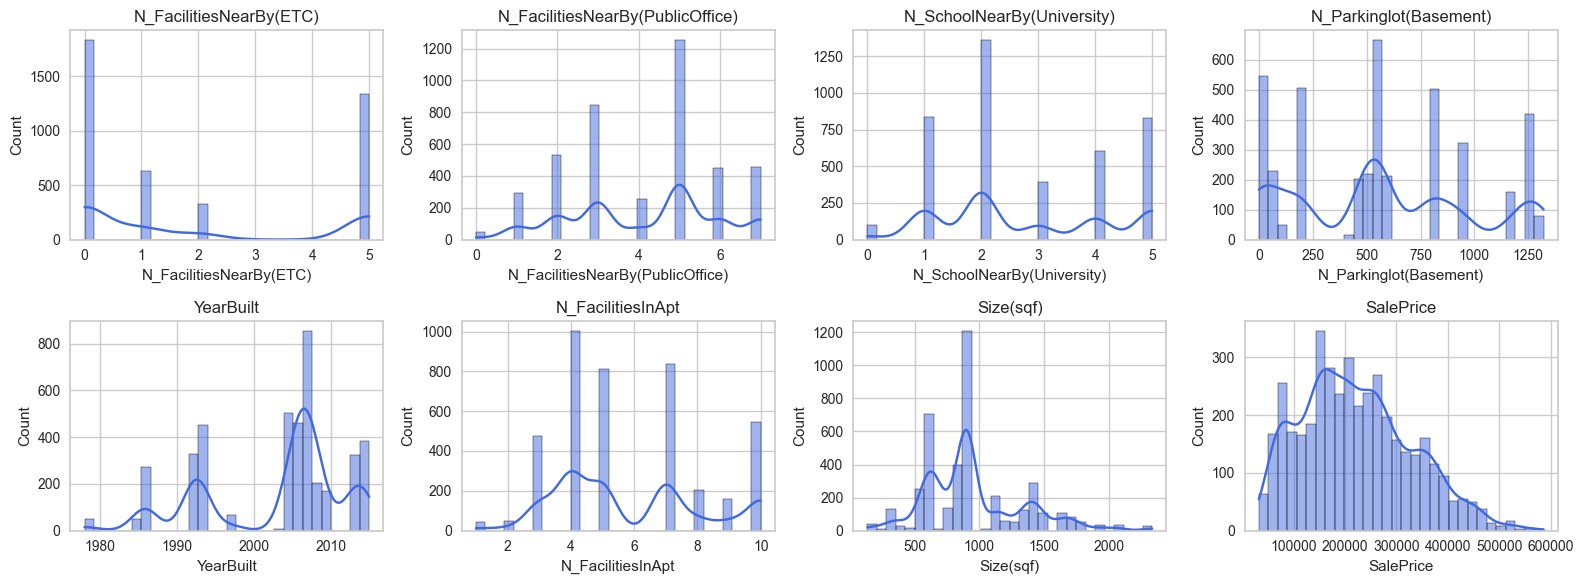

In [13]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64'])

n_cols = 4
n_rows = (numeric_cols.shape[1] + n_cols - 1) // n_cols

# subplot
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_clean[col], bins=30, kde=True, color="royalblue")
    plt.title(col)
    plt.tight_layout()

plt.show()

The distribution of the numerical data appears to be non-normal. Therefore, this should be taken into consideration during data preprocessing, particularly by applying data normalization, in order to build an accurate price prediction model.

## Multicolinearity and Significance of Each Column

### Checking Multicollinearity Values Without the `SalePrice` Column

In [14]:
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Kolom'] = numeric_cols.columns
    vif['VIF'] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
    vif['Acc'] = np.where(vif['VIF'] > 10, 'No', 'Yes')
    return vif

numeric_cols = df_clean.select_dtypes(include=['int64', 'float64'])
numeric_cols = numeric_cols.drop(columns = "SalePrice")
vif_calc(numeric_cols.select_dtypes(include=['int64', 'float64'])).sort_values(by="VIF",ascending=False)

,Kolom,VIF,Acc
4,YearBuilt,34.327180,No
5,N_FacilitiesInApt,27.840728,No
2,N_SchoolNearBy(University),18.284972,No
1,N_FacilitiesNearBy(PublicOffice),15.342707,No
3,N_Parkinglot(Basement),12.254853,No
6,Size(sqf),8.567090,Yes
0,N_FacilitiesNearBy(ETC),5.474361,Yes


The VIF (Variance Inflation Factor) results indicate that many columns exhibit signs of multicollinearity. Therefore, the model to be selected should be a non-linear model, as it is more flexible in handling multicollinear features.

### Checking Correlation Values in Columns
Checking correlation values using Spearman method due to non-normal data distribution.

<Axes: >

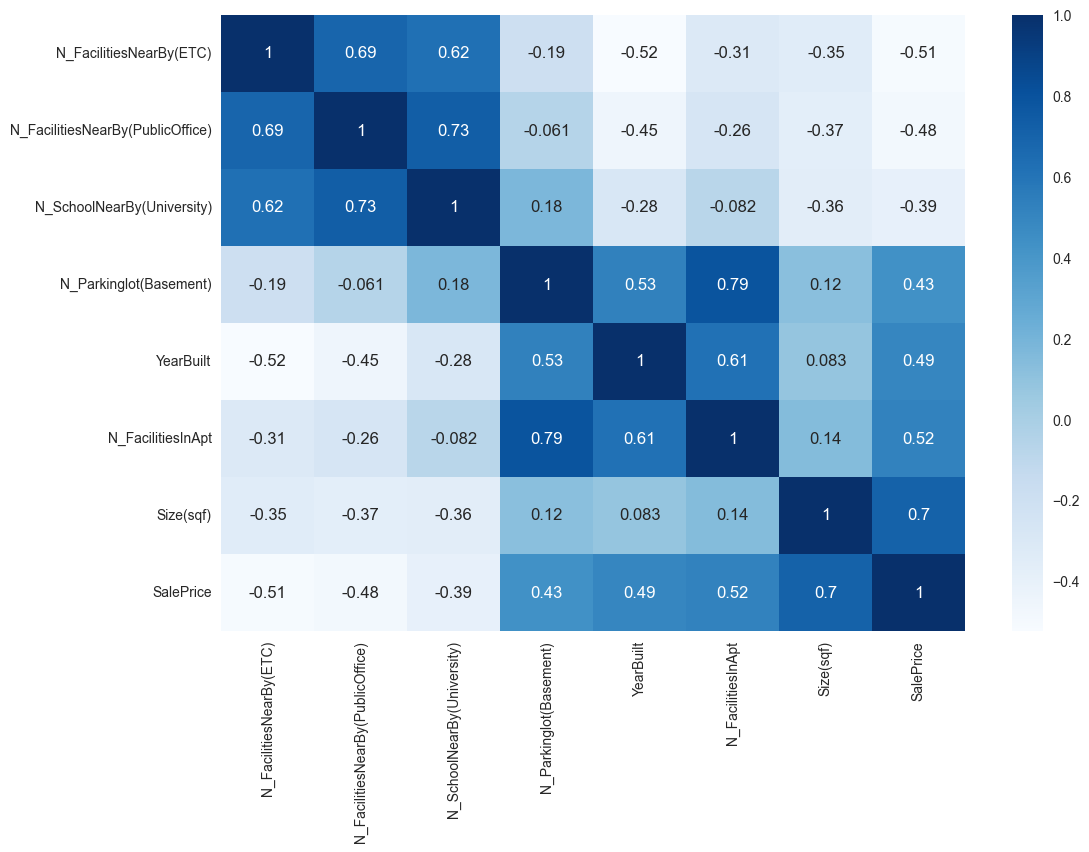

In [15]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64'])

df_rumah_Corr = numeric_cols.corr(method = 'spearman')
plt.figure(figsize = (12,8))
sns.heatmap(df_rumah_Corr, annot = True, cmap = 'Blues')

**Features with Positive Correlation to SalePrice**

* Size(sqf) → 0.74  
This is the highest correlation with the sale price. It indicates that the larger the apartment size, the higher the likely price.

* N_FacilitiesInApt → 0.52  
The number of facilities within the apartment has a fairly strong positive relationship. A well-equipped apartment might increase its market value.

* YearBuilt → 0.49  
Newer apartments tend to have higher prices, possibly due to more modern construction and better appeal to buyers.

* N_Parkinglot(Basement) → 0.43  
Availability of basement parking also affects apartment prices. This may reflect added comfort and convenience.

**Features with Low or Negative Correlation to SalePrice**

* N_FacilitiesNearBy(ETC) → -0.51  
This shows a significant negative correlation. It may indicate that having too many surrounding public facilities doesn’t always enhance property value—perhaps due to noise or congestion.

* N_FacilitiesNearBy(PublicOffice) → -0.48  
Similar to the above, being near public offices does not correlate positively with price—possibly due to busy surroundings or less premium locations.

* N_SchoolNearBy(University) → -0.39  
The correlation is also negative. Apartments near universities might be targeted more for short-term rental rather than long-term investment, lowering their selling value.


On average, as the number of facilities increases, the average sale price also rises, indicating an overall positive trend. This strengthens the assumption that the number of facilities in an apartment positively correlates with its price.

However, there is an anomaly observed between 5 and 7 facilities where the average price decreases. This could be due to factors such as the type or quality of the facilities, which might influence the price differently despite the higher number of facilities.

## Visualization of Each Numerical Column vs Price

In [16]:
# Size vs Average Price
AveragePricePerSize = df_clean.groupby(by="Size(sqf)")["SalePrice"].mean().reset_index()

# Number of Apartment Facility vs Average Price
AveragePricePerNFacilities = df_clean.groupby(by="N_FacilitiesInApt")["SalePrice"].mean().reset_index()

# Year Built vs Average Price
AveragePricePerYear = df_clean.groupby(by="YearBuilt")["SalePrice"].mean().reset_index()

# Parking Lot vs Average Price
AveragePricePerParkingLot = df_clean.groupby(by="N_Parkinglot(Basement)")["SalePrice"].mean().reset_index()

# Number of Nearby Facilities vs Average Price
AveragePricePerFacilitiesNearby = df_clean.groupby(by="N_FacilitiesNearBy(ETC)")["SalePrice"].mean().reset_index()

#Number of Nearby Offices vs Average Price
AveragePricePerOfficesNearby = df_clean.groupby(by="N_FacilitiesNearBy(PublicOffice)")["SalePrice"].mean().reset_index()

#Number of University Nearby vs Average Price
AveragePricePerSchoolNearby = df_clean.groupby(by="N_SchoolNearBy(University)")["SalePrice"].mean().reset_index()

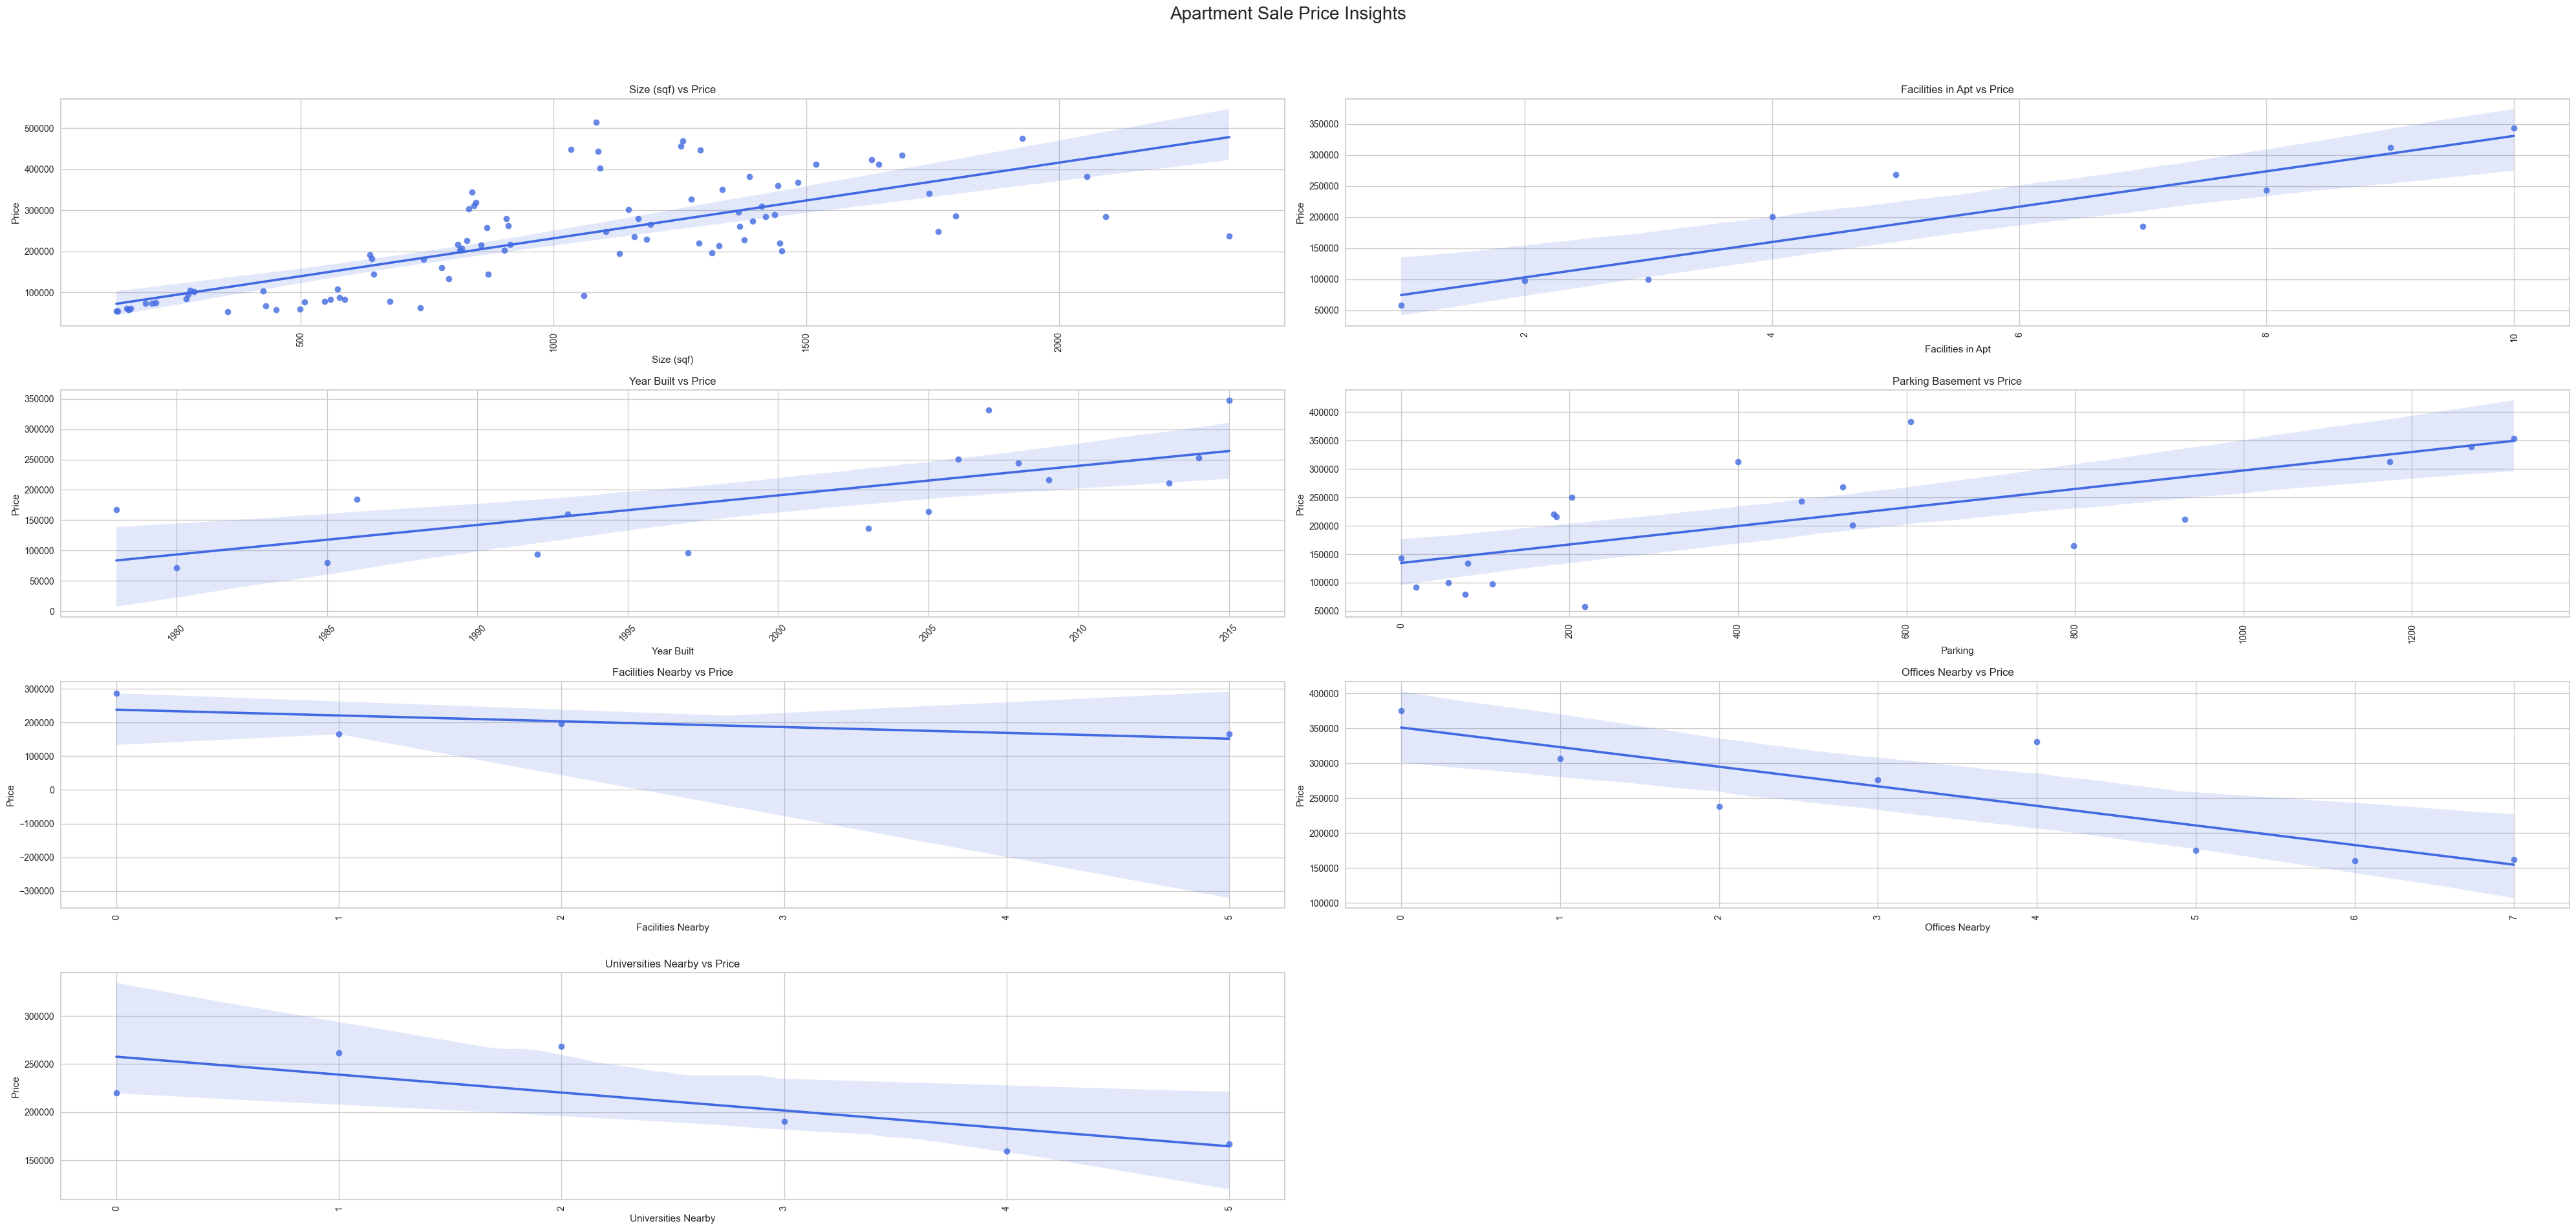

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(40, 20))  # Adjusted to 4 rows and 2 columns
fig.suptitle("Apartment Sale Price Insights", fontsize=20)

# Plot 1: Size vs Price
sns.regplot(data=AveragePricePerSize, x="Size(sqf)", y="SalePrice", color='royalblue', ax=axes[0, 0])
axes[0, 0].set_title("Size (sqf) vs Price")
axes[0, 0].set_xlabel("Size (sqf)")
axes[0, 0].set_ylabel("Price")
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot 2: Facilities in Apartment vs Price
sns.regplot(data=AveragePricePerNFacilities, x="N_FacilitiesInApt", y="SalePrice", color='royalblue', ax=axes[0, 1])
axes[0, 1].set_title("Facilities in Apt vs Price")
axes[0, 1].set_xlabel("Facilities in Apt")
axes[0, 1].set_ylabel("Price")
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot 3: Year Built vs Price
sns.regplot(data=AveragePricePerYear, x="YearBuilt", y="SalePrice", marker='o', color='royalblue', ax=axes[1, 0])
axes[1, 0].set_title("Year Built vs Price")
axes[1, 0].set_xlabel("Year Built")
axes[1, 0].set_ylabel("Price")
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Parking vs Price
sns.regplot(data=AveragePricePerParkingLot, x="N_Parkinglot(Basement)", y="SalePrice", color='royalblue', ax=axes[1, 1])
axes[1, 1].set_title("Parking Basement vs Price")
axes[1, 1].set_xlabel("Parking")
axes[1, 1].set_ylabel("Price")
axes[1, 1].tick_params(axis='x', rotation=90)

# Plot 5: Facilities Nearby vs Price
sns.regplot(data=AveragePricePerFacilitiesNearby, x="N_FacilitiesNearBy(ETC)", y="SalePrice", color='royalblue', ax=axes[2, 0])
axes[2, 0].set_title("Facilities Nearby vs Price")
axes[2, 0].set_xlabel("Facilities Nearby")
axes[2, 0].set_ylabel("Price")
axes[2, 0].tick_params(axis='x', rotation=90)

# Plot 6: Nearby Offices vs Price
sns.regplot(data=AveragePricePerOfficesNearby, x="N_FacilitiesNearBy(PublicOffice)", y="SalePrice", color='royalblue', ax=axes[2, 1])
axes[2, 1].set_title("Offices Nearby vs Price")
axes[2, 1].set_xlabel("Offices Nearby")
axes[2, 1].set_ylabel("Price")
axes[2, 1].tick_params(axis='x', rotation=90)

# Plot 7: Universities Nearby vs Price
sns.regplot(data=AveragePricePerSchoolNearby, x="N_SchoolNearBy(University)", y="SalePrice", color='royalblue', ax=axes[3, 0])
axes[3, 0].set_title("Universities Nearby vs Price")
axes[3, 0].set_xlabel("Universities Nearby")
axes[3, 0].set_ylabel("Price")
axes[3, 0].tick_params(axis='x', rotation=90)

# Leave the last subplot blank (optional)
axes[3, 1].axis("off")  # No 8th plot, so we turn this off

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap

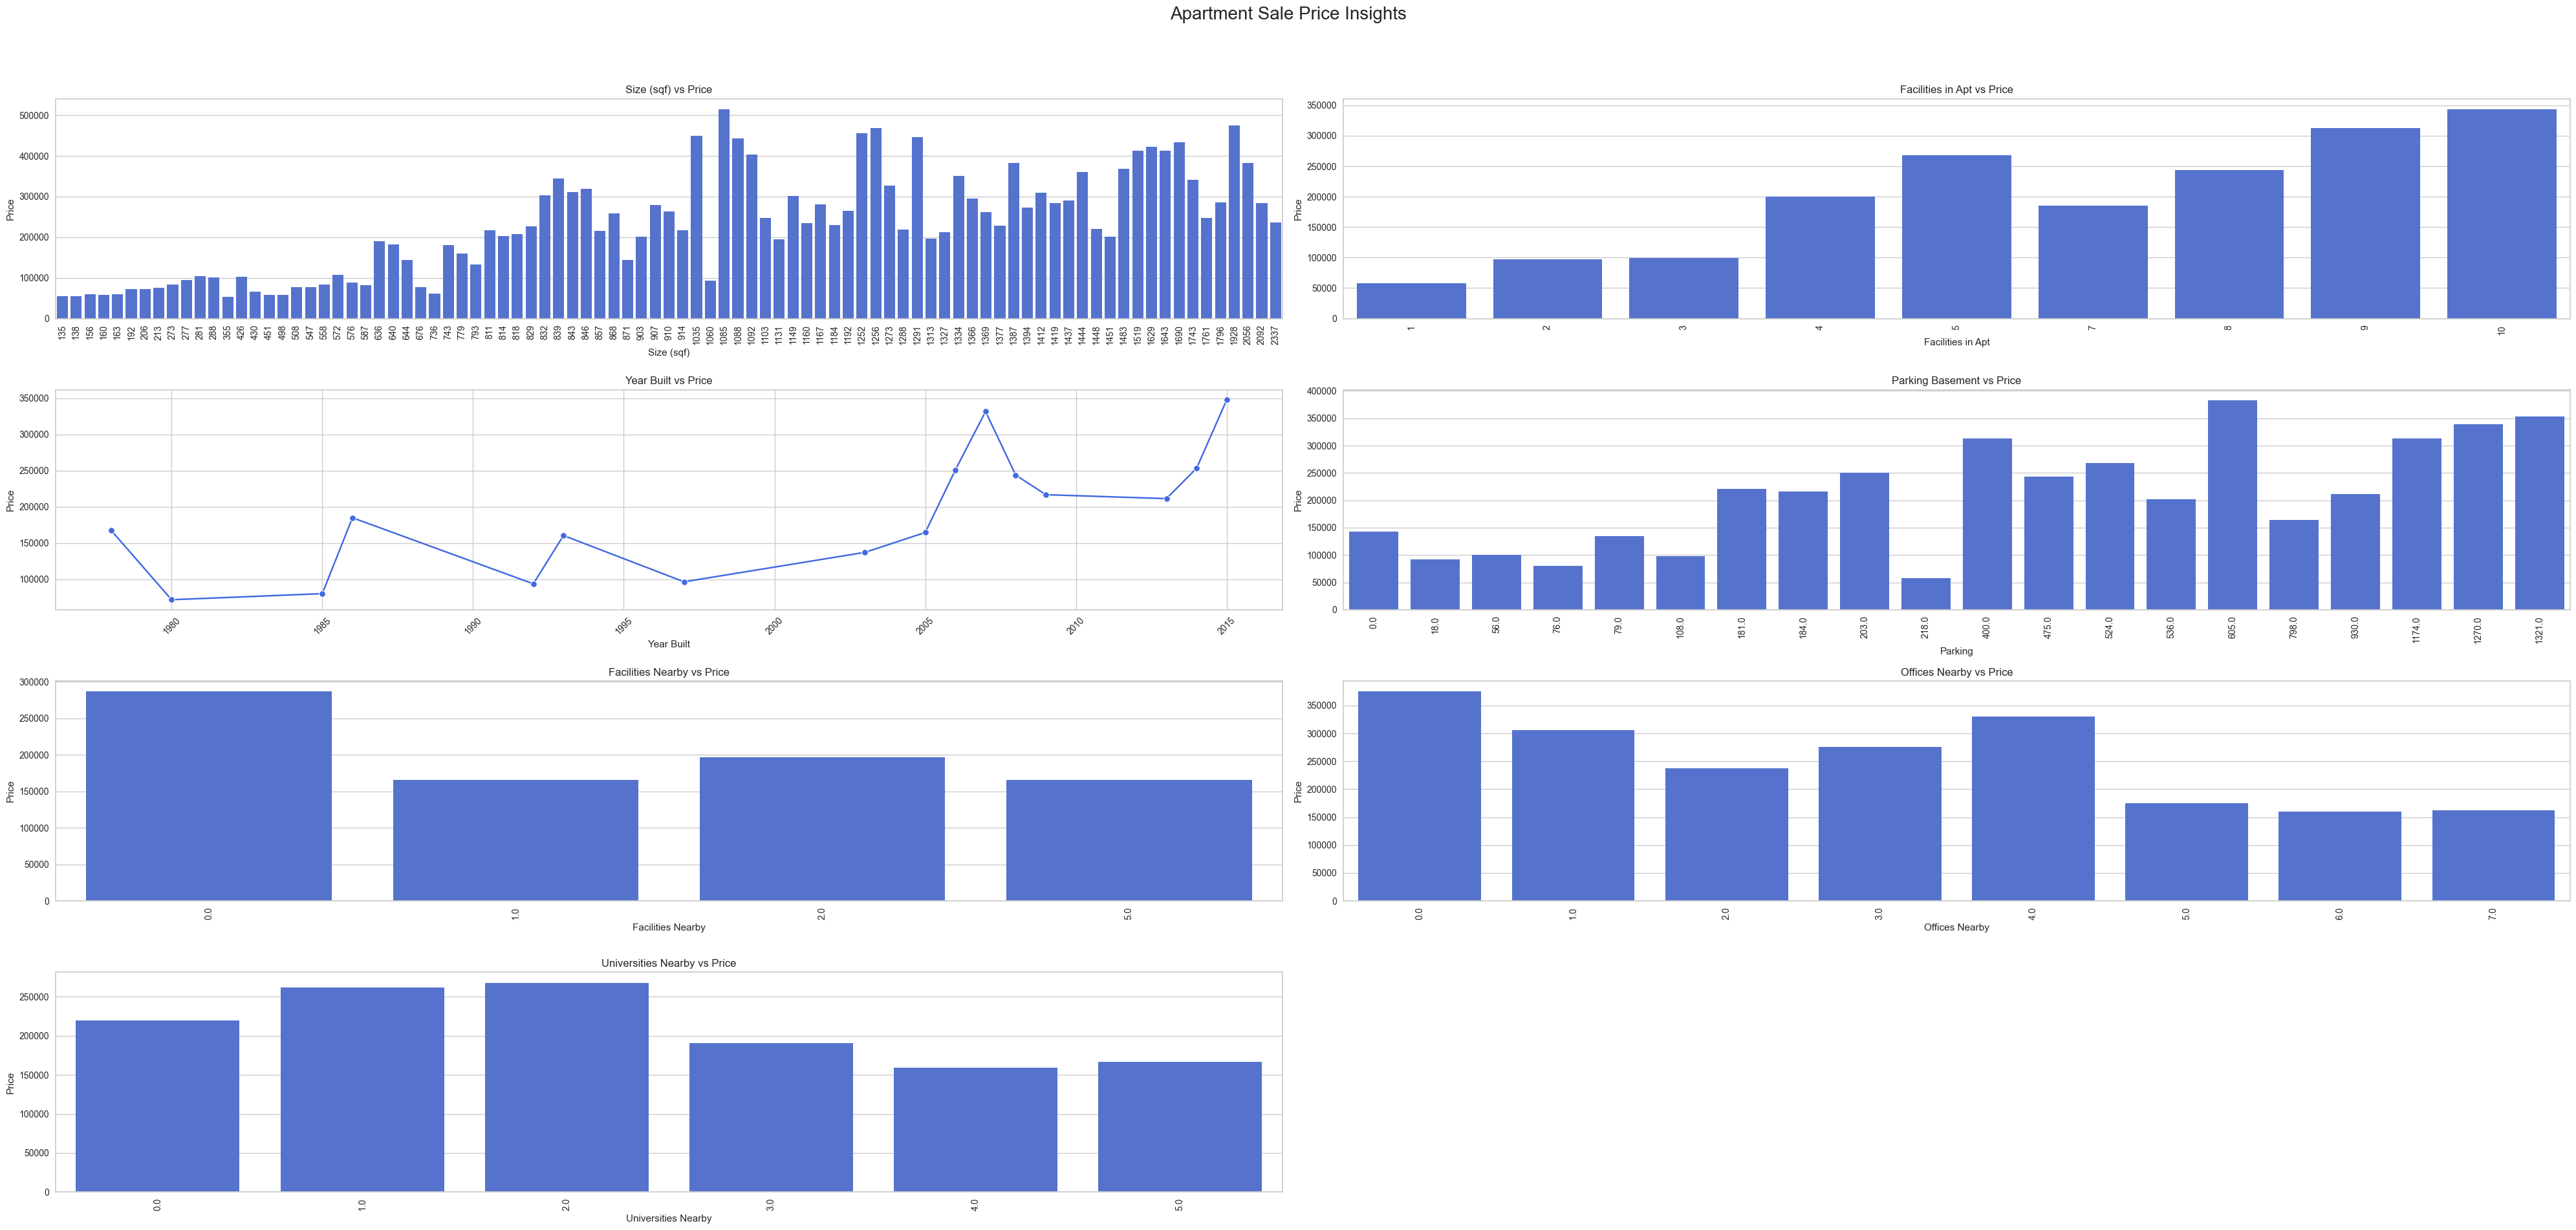

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(40, 20))  # Adjusted to 4 rows and 2 columns
fig.suptitle("Apartment Sale Price Insights", fontsize=20)

# Plot 1: Size vs Price
sns.barplot(data=AveragePricePerSize, x="Size(sqf)", y="SalePrice", color='royalblue', ax=axes[0, 0])
axes[0, 0].set_title("Size (sqf) vs Price")
axes[0, 0].set_xlabel("Size (sqf)")
axes[0, 0].set_ylabel("Price")
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot 2: Facilities in Apartment vs Price
sns.barplot(data=AveragePricePerNFacilities, x="N_FacilitiesInApt", y="SalePrice", color='royalblue', ax=axes[0, 1])
axes[0, 1].set_title("Facilities in Apt vs Price")
axes[0, 1].set_xlabel("Facilities in Apt")
axes[0, 1].set_ylabel("Price")
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot 3: Year Built vs Price
sns.lineplot(data=AveragePricePerYear, x="YearBuilt", y="SalePrice", marker='o', color='royalblue', ax=axes[1, 0])
axes[1, 0].set_title("Year Built vs Price")
axes[1, 0].set_xlabel("Year Built")
axes[1, 0].set_ylabel("Price")
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Parking vs Price
sns.barplot(data=AveragePricePerParkingLot, x="N_Parkinglot(Basement)", y="SalePrice", color='royalblue', ax=axes[1, 1])
axes[1, 1].set_title("Parking Basement vs Price")
axes[1, 1].set_xlabel("Parking")
axes[1, 1].set_ylabel("Price")
axes[1, 1].tick_params(axis='x', rotation=90)

# Plot 5: Facilities Nearby vs Price
sns.barplot(data=AveragePricePerFacilitiesNearby, x="N_FacilitiesNearBy(ETC)", y="SalePrice", color='royalblue', ax=axes[2, 0])
axes[2, 0].set_title("Facilities Nearby vs Price")
axes[2, 0].set_xlabel("Facilities Nearby")
axes[2, 0].set_ylabel("Price")
axes[2, 0].tick_params(axis='x', rotation=90)

# Plot 6: Nearby Offices vs Price
sns.barplot(data=AveragePricePerOfficesNearby, x="N_FacilitiesNearBy(PublicOffice)", y="SalePrice", color='royalblue', ax=axes[2, 1])
axes[2, 1].set_title("Offices Nearby vs Price")
axes[2, 1].set_xlabel("Offices Nearby")
axes[2, 1].set_ylabel("Price")
axes[2, 1].tick_params(axis='x', rotation=90)

# Plot 7: Universities Nearby vs Price
sns.barplot(data=AveragePricePerSchoolNearby, x="N_SchoolNearBy(University)", y="SalePrice", color='royalblue', ax=axes[3, 0])
axes[3, 0].set_title("Universities Nearby vs Price")
axes[3, 0].set_xlabel("Universities Nearby")
axes[3, 0].set_ylabel("Price")
axes[3, 0].tick_params(axis='x', rotation=90)

# Leave the last subplot blank (optional)
axes[3, 1].axis("off")  # No 8th plot, so we turn this off

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
plt.show()

**Insight**:
1. **Size vs Price**

In general, an increase in apartment size corresponds with a rise in the average selling price. This indicates that size can be a significant factor positively correlated with the determination of the selling price.

There are some anomalies in the data that indicate fluctuations contrary to the general trend of increasing apartment size leading to higher average sale prices. These anomalies could be caused by external factors beyond size, such as year built, facilities, apartment type, parking spots, and etc.

2. **Apartment Facilities vs Price**

On average, as the number of facilities increases, the average sale price also rises, indicating an overall positive trend. This strengthens the assumption that the number of facilities in an apartment positively correlates with its price.

However, there is an anomaly observed between 5 and 7 facilities where the average price decreases. This could be due to factors such as the type or quality of the facilities, which might influence the price differently despite the higher number of facilities.

3. **Year Built vs Price**

There is a noticeable fluctuation in the average apartment price from year to year. These price changes could be influenced by external factors beyond the scope of the current dataset. However, when viewed overall, from 1980 to 2015, the average prices show a generally positive trend. This may indicate that the construction year of an apartment could have an influence on its market price.

This statement is further supported by the fact that the average apartment prices after the year 2000 increased significantly compared to those built before 2000. This suggests that building age is a significant factor in determining property valuation. The sharp rise in prices may be attributed to modernization in terms of construction quality, enhanced facilities, or even a surge in market interest in newer properties after the 2000s.

4. **Parking Lot vs Price**

Based on the visualization, the number of basement parking spaces does not show a consistent linear relationship with the average apartment sale price. Although apartments with a very high number of parking spots (above 1,000 units) tend to have higher prices, there is significant fluctuation in the mid-range categories (100–600 units), indicating that other factors such as apartment size, internal facilities, or location may have a stronger influence on pricing. This suggests that the number of parking spots is not always a strong indicator of apartment value, except in large-scale or luxury properties. This also explains why the positive correlation between parking availability and price is the weakest among the positively correlated features.

5. **Number of Nearby Facilities vs Price**

Based on the visualization, apartments with no nearby public facilities tend to have a higher average sale price compared to those surrounded by one or more facilities. This suggests that the presence of nearby public amenities does not necessarily add value to the property. One possible explanation is that proximity to such facilities may bring noise, congestion, or high foot traffic, which could reduce the desirability of the residence. Therefore, being close to public facilities can, in some contexts, be a disadvantage, depending on market preferences or the specific location of the property.

6. **Number of Nearby Offices vs Price**

Based on the visualization, apartments with no nearby public offices tend to have the highest average sale prices. As the number of nearby offices increases, the average sale price generally declines, with a notable drop observed beyond four offices. This suggests that proximity to multiple public offices may negatively impact apartment prices, potentially due to increased traffic, noise, or less desirable surroundings associated with office zones. While there is a slight increase at 4 offices, the overall trend reinforces the idea that a higher concentration of public offices nearby might detract from the residential appeal and perceived property value.

7. **Number of Nearby Universities vs Price**

Based on the chart, apartment sale prices tend to be higher when there are 1 or 2 universities nearby, suggesting moderate proximity to universities may add value, potentially due to demand from faculty or long-term student residents. However, as the number of nearby universities increases beyond two, the average sale price noticeably drops. This decline could indicate that areas heavily concentrated with universities are less appealing for property buyers, possibly due to student density, noise, or short-term rental turnover. Thus, while a limited number of universities nearby can be a selling point, too many may reduce the property's desirability and value.

## Visualization of Each Categorical Column vs Price

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [20]:
df_clean["SubwayStation"].unique()

array(['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

In [21]:
AveragePricePerType = df_clean.groupby(by="HallwayType")["SalePrice"].mean().reset_index()

AveragePricePerTimeToSubway = df_clean.groupby(by="TimeToSubway")["SalePrice"].mean().reset_index()
desired_order = ['no_bus_stop_nearby','0-5min', '5min~10min', '10min~15min', '15min~20min']
AveragePricePerTimeToSubway["TimeToSubway"] = pd.Categorical(
    AveragePricePerTimeToSubway["TimeToSubway"],
    categories=desired_order,
    ordered=True)
AveragePricePerTimeToSubway = AveragePricePerTimeToSubway.sort_values("TimeToSubway").reset_index(drop=True)


AveragePricePerSubwayStation = df_clean.groupby(by="SubwayStation")["SalePrice"].mean().reset_index()
desired_order = ['no_subway_nearby', 'Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'Myung-duk', 'Daegu']
AveragePricePerSubwayStation["SubwayStation"] = pd.Categorical(
    AveragePricePerSubwayStation["SubwayStation"],
    categories=desired_order,
    ordered=True)
AveragePricePerSubwayStation = AveragePricePerSubwayStation.sort_values("SubwayStation").reset_index(drop=True)

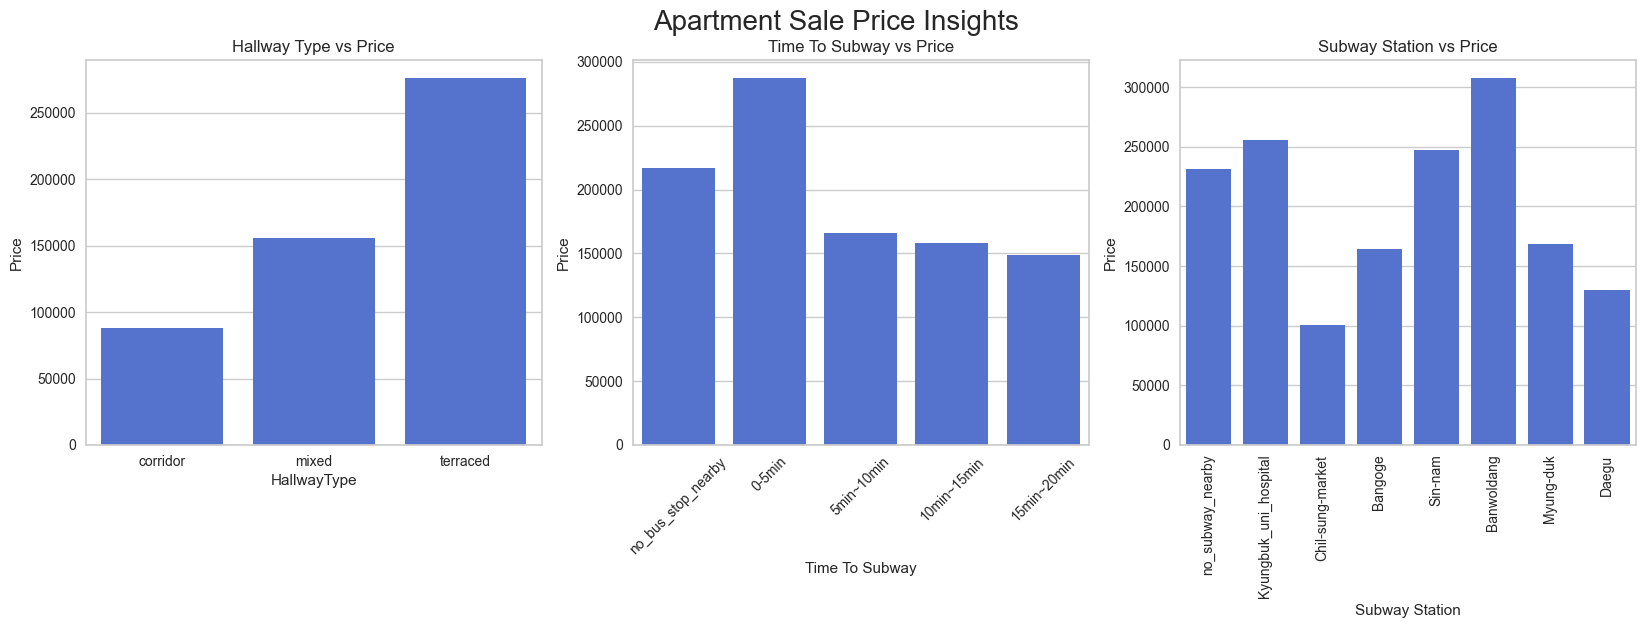

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Apartment Sale Price Insights", fontsize=20)

# Plot 1: Hallway Type vs Price
sns.barplot(data=AveragePricePerType, x="HallwayType", y="SalePrice", color='royalblue', ax=axes[0])
axes[0].set_title("Hallway Type vs Price")
axes[0].set_xlabel("HallwayType")
axes[0].set_ylabel("Price")
axes[0].tick_params(axis='x')

# Plot 2: Time To Subway vs Price
sns.barplot(data=AveragePricePerTimeToSubway, x="TimeToSubway", y="SalePrice", color='royalblue', ax=axes[1])
axes[1].set_title("Time To Subway vs Price")
axes[1].set_xlabel("Time To Subway")
axes[1].set_ylabel("Price")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Subway Station vs Price
sns.barplot(data=AveragePricePerSubwayStation, x="SubwayStation", y="SalePrice", color='royalblue', ax=axes[2])
axes[2].set_title("Subway Station vs Price")
axes[2].set_xlabel("Subway Station")
axes[2].set_ylabel("Price")
axes[2].tick_params(axis='x', rotation=90)

**Insight**:
1. **Hallway Type vs Price**

Apartments with a terraced hallway type show the highest average sale price compared to corridor and mixed types. This suggests that building layouts offering greater privacy or outdoor access—such as terraced designs—are more appealing to buyers.

2. **Time to Subway vs Price**

Properties located within 0–5 minutes walking distance to a subway station have the highest average prices, followed by those with no subway nearby. The average price tends to decrease as walking time increases. This indicates that proximity to public transportation, especially subways, plays a crucial role in increasing property value, although a lack of access can still be offset by other factors such as location or amenities.

3. **Subway Station vs Price**

There are significant variations in apartment prices depending on the nearby subway station. Bannwol-dong has the highest average price, followed by Sinban and Kyungbuk Univ. Hospital, while Kyungbuk Sun Market and Daegu show the lowest. This likely reflects differences in surrounding environment quality, available facilities, or the overall desirability of each area.

## Outlier Check pada size

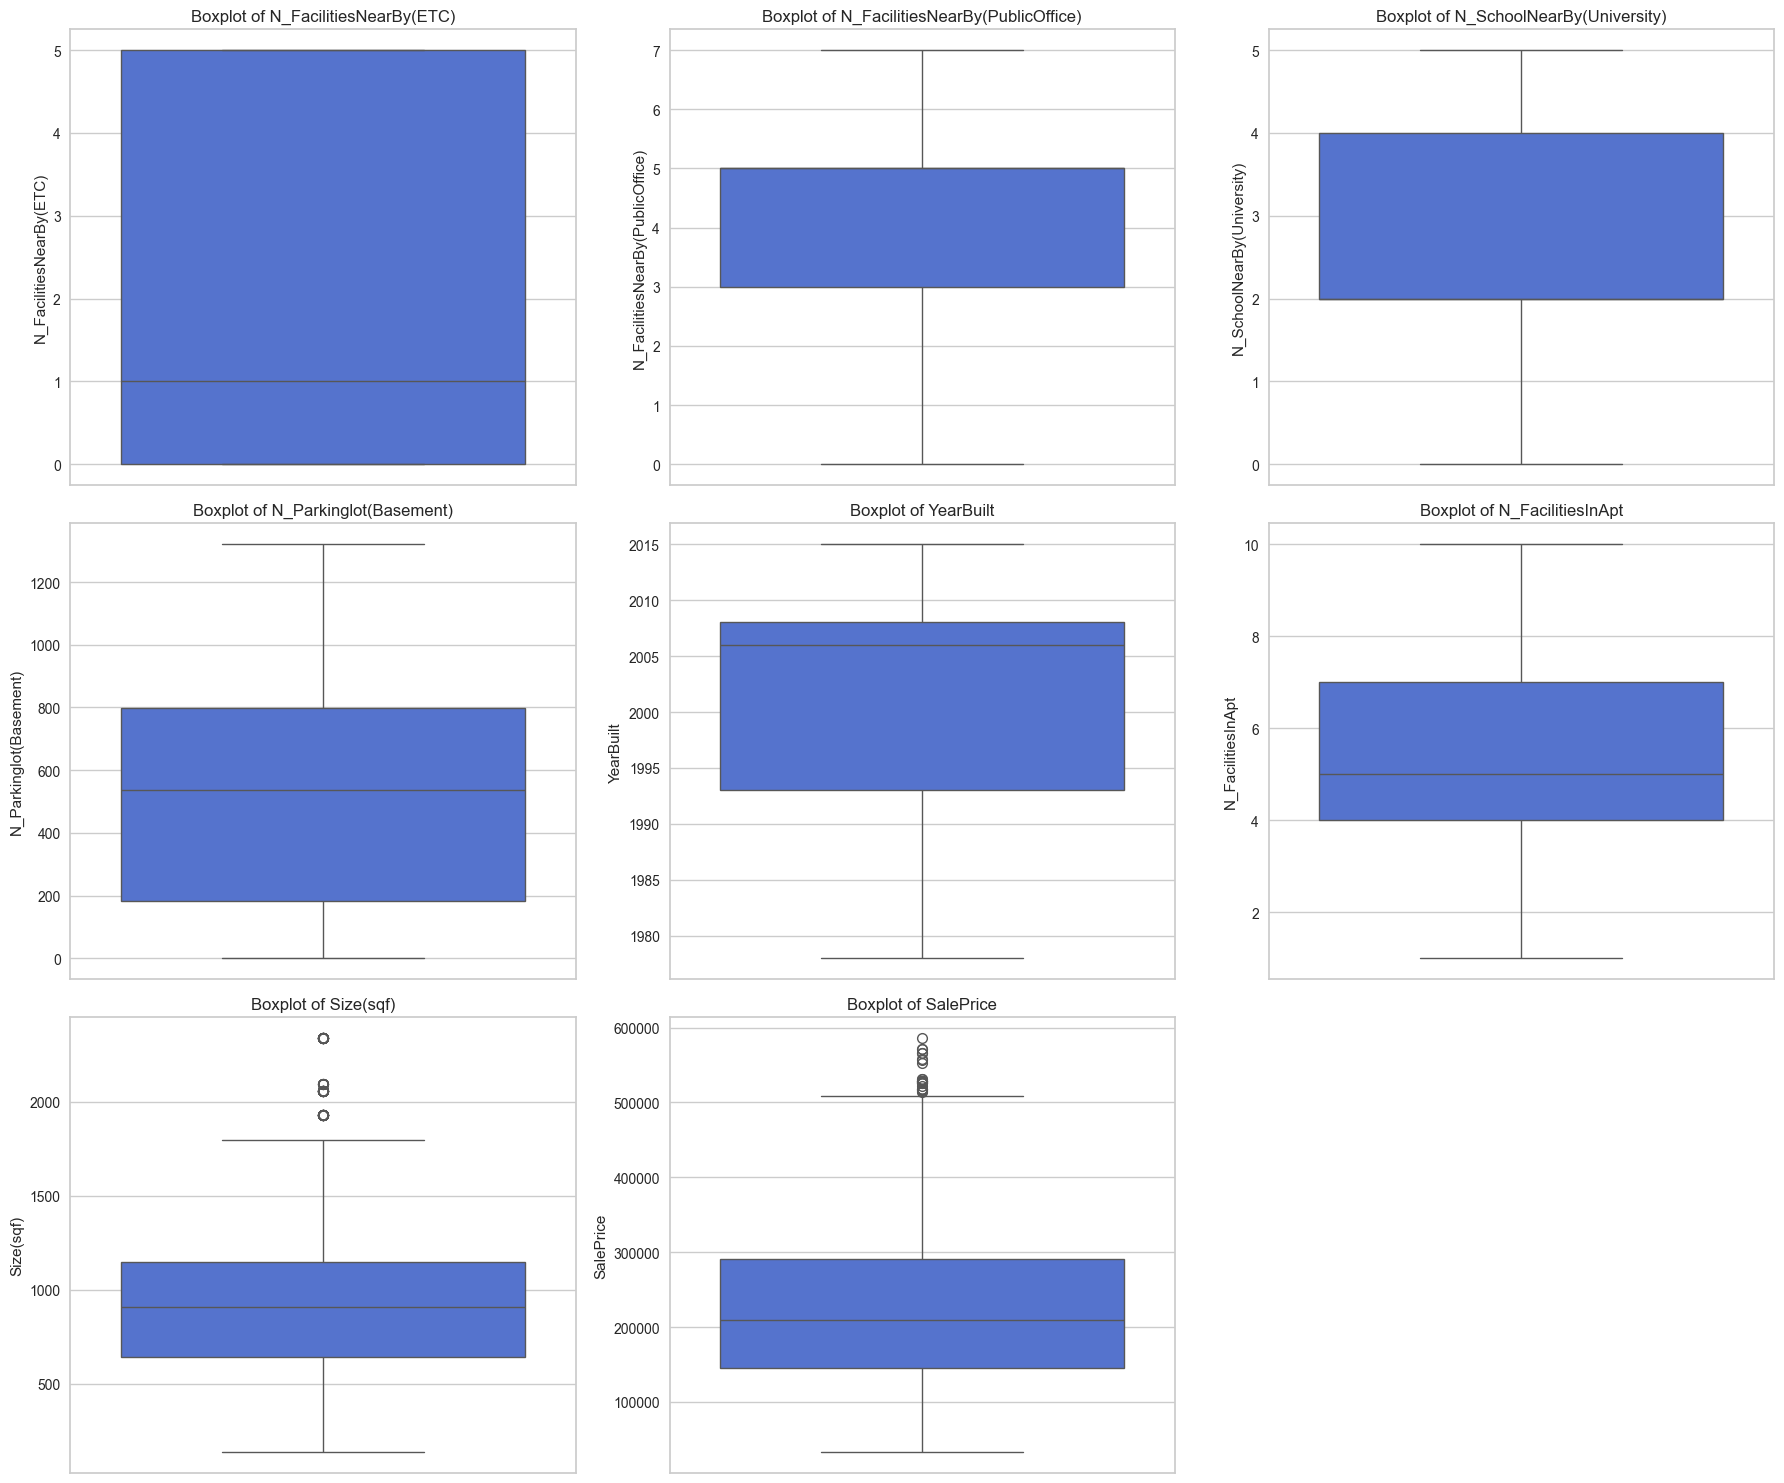

In [23]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64'])

n_cols = 3  # jumlah kolom subplot per baris, bisa disesuaikan
n_rows = (len(numeric_cols.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_clean, y=col, color='royalblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

There are outlier values in the `Size(sqf)` and `SalePrice` columns. Further investigation is needed to check whether there are data points that are outliers in both columns simultaneously. If such data exist, these outliers should not be dropped because, fundamentally, the `Size(sqf)` variable influences the `SalePrice`.

In [24]:
def extract_outliers(df_clean, col):
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Outlier = df[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    return Outlier

outlier_saleprice = extract_outliers(df_clean, 'SalePrice')
outlier_size = extract_outliers(df_clean, 'Size(sqf)')

In [25]:
idx_size = set(outlier_size.index)
idx_saleprice = set(outlier_saleprice.index)

common_indices = idx_size.intersection(idx_saleprice)

outliers_both = outlier_size.loc[list(common_indices)]

print(f"Number of same data points that are outliers in both sets: {len(common_indices)}")

Number of same data points that are outliers in both sets: 17


There are 17 data points that appear as outliers in both Size(sqf) and SalePrice. This indicates that the size strongly influences the sale price. Therefore, these outliers cannot be considered anomalies.

Data that are not included in these 17 common data points can be dropped during the "Data Preparation" phase because they are considered outside the observable data range suitable for building a machine learning model to predict prices

# Data Preparation
In the data pre-processing phase, the data will be prepared for Machine Learning processing to obtain apartment price valuation.

1. Drop outliers
2. Define X and y as feature columns and target variable
3. Encode categorical data
4. Split the data into training and testing sets
5. Scale the features

## Drop Outliers
As previously explained, outliers will be dropped from the entire dataset, except for outliers that appear in both the `Size(sqf)` and `SalePrice` columns.

In [26]:
# Outlier indices in each column
idx_size = set(outlier_size.index)
idx_saleprice = set(outlier_saleprice.index)

# Outlier indices that exist in both columns
common_indices = idx_size.intersection(idx_saleprice)

# Combine all outlier indices
all_outliers = idx_size.union(idx_saleprice)

# Outliers that exist in only one column (not in both)
outliers_to_drop = all_outliers.difference(common_indices)

# Drop those data from df_clean
df_clean = df_clean.drop(index=list(outliers_to_drop))

## Define X and y as Feature Columns and Target Variable
Define X as the features that influence the price and y as the target to be predicted, which is the price.

In [27]:
X = df_clean.drop(columns="SalePrice")
y = df_clean["SalePrice"]

In [28]:
df_clean.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

## Encode Categorical Data
The encoding process will be adjusted according to the types of categories present in the columns.

1. **One Hot Encoding** for `HallwayType` dan `SubwayStation`

The variables HallwayType and SubwayStation are categorical features representing types or names without any inherent order or ranking. Therefore, One Hot Encoding is suitable for these variables, as it converts each category into a binary vector without implying any ordinal relationship. This allows the model to treat each category as a separate and distinct feature.

2. **Ordinal Encoding** for `TimeToSubway`

The `TimeToSubway` variable is ordinal because the categories represent meaningful ordered intervals of travel time (e.g., 0-5 minutes is closer than 5-10 minutes). Therefore, Ordinal Encoding is the appropriate method to convert these categories into numerical values that preserve their natural order. This helps the model understand the relative proximity to the subway station.

### One Hot Encoding

In [29]:
#Order before drop
ordered_Hallway = ['terraced', 'mixed', 'corridor']
X['HallwayType'] = pd.Categorical(X['HallwayType'], categories=ordered_Hallway, ordered=True)

ordered_Station = ['no_subway_nearby','Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'Myung-duk', 'Daegu']
X['SubwayStation'] = pd.Categorical(X['SubwayStation'], categories=ordered_Station, ordered=True)

In [30]:
X_encoded = pd.get_dummies(X, columns=['HallwayType', 'SubwayStation'], drop_first=True, dtype=int)
X_encoded.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_mixed,HallwayType_corridor,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Chil-sung-market,SubwayStation_Bangoge,SubwayStation_Sin-nam,SubwayStation_Banwoldang,SubwayStation_Myung-duk,SubwayStation_Daegu
0,0-5min,0.0,3.0,2.0,1270.0,2007,10,1387,0,0,1,0,0,0,0,0,0
1,10min~15min,1.0,5.0,1.0,0.0,1986,4,914,0,0,1,0,0,0,0,0,0
2,15min~20min,1.0,7.0,3.0,56.0,1997,5,558,1,0,0,1,0,0,0,0,0
3,5min~10min,5.0,5.0,4.0,798.0,2005,7,914,1,0,0,0,1,0,0,0,0
4,0-5min,0.0,1.0,2.0,536.0,2006,5,1743,0,0,0,0,0,1,0,0,0


### Ordinal Encoding

In [31]:
ordered_TimetoSubway = ['no_bus_stop_nearby','0-5min','5min~10min', '10min~15min', '15min~20min']
X['TimeToSubway'] = pd.Categorical(X['TimeToSubway'], categories=ordered_TimetoSubway, ordered=True)

In [32]:
from sklearn.preprocessing import OrdinalEncoder
ordered_TimetoSubway = ['no_bus_stop_nearby','0-5min','5min~10min', '10min~15min', '15min~20min']

# Pastikan kolomnya bertipe kategori terurut
X['TimeToSubway'] = pd.Categorical(X['TimeToSubway'], categories=ordered_TimetoSubway, ordered=True)

# Buat encoder dengan kategori yang dibungkus list
encoder = OrdinalEncoder(categories=[ordered_TimetoSubway])

# Transform kolomnya
X_encoded['TimeToSubway'] = encoder.fit_transform(X[['TimeToSubway']]).astype(int)

# Lihat hasil
X_encoded.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_mixed,HallwayType_corridor,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Chil-sung-market,SubwayStation_Bangoge,SubwayStation_Sin-nam,SubwayStation_Banwoldang,SubwayStation_Myung-duk,SubwayStation_Daegu
0,1,0.0,3.0,2.0,1270.0,2007,10,1387,0,0,1,0,0,0,0,0,0
1,3,1.0,5.0,1.0,0.0,1986,4,914,0,0,1,0,0,0,0,0,0
2,4,1.0,7.0,3.0,56.0,1997,5,558,1,0,0,1,0,0,0,0,0
3,2,5.0,5.0,4.0,798.0,2005,7,914,1,0,0,0,1,0,0,0,0
4,1,0.0,1.0,2.0,536.0,2006,5,1743,0,0,0,0,0,1,0,0,0


## Splitting
Splitting is done to divide the data into training and testing sets. This is necessary to prevent information leakage during model training and evaluation, ensuring that the model's performance is assessed on unseen data.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Scaling
Scaling is the process of changing the scale or range of feature values (input variables) to be within a certain range or to have a specific distribution. The goal is to ensure that the features in the dataset have comparable scales so that the machine learning model can learn more effectively and quickly.

From the available data, the columns that need scaling are those with continuous numerical values or columns that have a very large numerical range. Scaling is necessary so that the machine learning model can work optimally and the features have comparable scales.

Columns to be scaled:

1. `TimeToSubway` (result of ordinal encoding, discrete numerical values, usually scaled to make the model more sensitive to differences in levels)

2. `N_FacilitiesNearBy(ETC)` (number of facilities, numerical)

3. `N_FacilitiesNearBy(PublicOffice)` (number of facilities, numerical)

4. `N_SchoolNearBy(University)` (number of facilities, numerical)

5. `N_Parkinglot(Basement)` (number of facilities, numerical)

6. `YearBuilt` (year, large range, needs scaling to prevent dominance)

7. `N_FacilitiesInApt` (number of facilities, numerical)

8. `Size(sqf)` (area, numerical with large range)

**Robust Scaling** is chosen because it is particularly effective when the data contains outliers or is not normally distributed. Unlike other scalers that rely on the mean and standard deviation, RobustScaler uses the median and the interquartile range (IQR) to scale the data. This makes it more resistant to the influence of outliers and better suited for features with skewed distributions. Since the histplot analysis shows that most of the columns are not normally distributed—even though they do not contain extreme outliers—RobustScaler is a safe and reliable choice to normalize the scale of features without distorting their internal relationships.

In [34]:
X_encoded.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_mixed,HallwayType_corridor,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Chil-sung-market,SubwayStation_Bangoge,SubwayStation_Sin-nam,SubwayStation_Banwoldang,SubwayStation_Myung-duk,SubwayStation_Daegu
0,1,0.0,3.0,2.0,1270.0,2007,10,1387,0,0,1,0,0,0,0,0,0
1,3,1.0,5.0,1.0,0.0,1986,4,914,0,0,1,0,0,0,0,0,0
2,4,1.0,7.0,3.0,56.0,1997,5,558,1,0,0,1,0,0,0,0,0
3,2,5.0,5.0,4.0,798.0,2005,7,914,1,0,0,0,1,0,0,0,0
4,1,0.0,1.0,2.0,536.0,2006,5,1743,0,0,0,0,0,1,0,0,0


In [35]:
ScaledColumns = ["TimeToSubway", "N_FacilitiesNearBy(ETC)", "N_FacilitiesNearBy(PublicOffice)", "N_SchoolNearBy(University)", "N_Parkinglot(Basement)", "YearBuilt", "N_FacilitiesInApt", "Size(sqf)" ]
transformer = ColumnTransformer([
    ('robust', RobustScaler(), ScaledColumns)
], remainder = 'passthrough')


# Benchmarking Modelling
A model is needed as a benchmark for the machine learning process to predict the Value. The models used are:

1. Ridge

Ridge regression is a linear regression model with L2 regularization. It is especially useful when there is multicollinearity among features, as Ridge can stabilize the regression coefficients and prevent overfitting. Although it is a linear model, Ridge remains relevant as a baseline model to understand the basic performance of a stabilized linear approach.

2. Decision Tree Regressor

This model is a non-linear algorithm and is very suitable for handling data that do not have a normal distribution or linear relationships among features. Decision Trees are naturally resistant to multicollinearity and do not require scaling. They are well-suited to capture complex relationships in property data such as location, size, and facilities.

3. KNN Regressor

KNN works based on the proximity (similarity) between data points, making it very sensitive to scale and outliers. However, with proper preprocessing (such as RobustScaler), KNN can become an effective model, especially for small to medium-sized datasets. It does not make any assumptions about the data distribution shape, making it suitable for data that are not normally distributed.

4. Random Forest

Random Forest is a non-linear ensemble model that combines many decision trees. It is very robust in handling non-normal data, multicollinearity, and noise. Random Forest also provides feature importance, which can aid interpretation. It is one of the models well-suited for property datasets with many complex and interrelated variables.

5. XG Boost

XGBoost is a more advanced boosting model than Random Forest. It builds trees sequentially by correcting errors from previous trees. XGBoost excels at handling outliers, multicollinearity, and non-normally distributed data. Additionally, XGBoost often delivers the best performance in numerical predictions and has strong regularization controls to prevent overfitting.

In [36]:
ridge = Ridge()
dt_reg = DecisionTreeRegressor()
knn = KNeighborsRegressor()
random_forest = RandomForestRegressor(random_state=42)
xgboost = XGBRegressor(random_state=42, objective='reg:squarederror')

In [37]:
### Benchmarking Model
model = [ridge, dt_reg, knn, random_forest, xgboost]

# metrics
list_scorer = ['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error']

# list
list_mean_rmse = []
list_mean_mae = []
list_mean_mape = []

list_std_rmse = []
list_std_mae = []
list_std_mape = []

list_all = []


for i in model:
    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])
    crossval = cross_validate(pipe_prep_model, 
                              X_train,
                              y_train,
                              cv = 5,
                              scoring = list_scorer
                              )
    list_all.append(crossval)
    list_mean_rmse.append(crossval['test_neg_root_mean_squared_error'].mean())
    list_mean_mape.append(crossval['test_neg_mean_absolute_percentage_error'].mean())
    list_mean_mae.append (crossval['test_neg_mean_absolute_error'].mean())

    list_std_rmse.append(crossval['test_neg_root_mean_squared_error'].std())
    list_std_mape.append(crossval['test_neg_mean_absolute_percentage_error'].std())
    list_std_mae.append (crossval['test_neg_mean_absolute_error'].std())

df_model_cv = pd.DataFrame()
df_model_cv['model'] = model
df_model_cv['mean_rmse'] = list_mean_rmse
df_model_cv['std_rmse'] = list_std_rmse
df_model_cv['mean_mape'] = list_mean_mape
df_model_cv['std_mape'] = list_std_mape
df_model_cv["mean_mae"] = list_mean_mae
df_model_cv["std_mae"] = list_std_mae
df_model_cv['mean_rmse'] = np.abs(df_model_cv['mean_rmse'])
df_model_cv['std_rmse'] = np.abs(df_model_cv['std_rmse'])
df_model_cv['mean_mape'] = np.abs(df_model_cv['mean_mape'])
df_model_cv['std_mape'] = np.abs(df_model_cv['std_mape'])
df_model_cv["mean_mae"] = np.abs(df_model_cv['mean_mae'])
df_model_cv["std_mae"] = np.abs(df_model_cv['std_mae'])
df_model_cv = df_model_cv.sort_values(by="mean_mape", ascending=True)

df_model_cv

,model,mean_rmse,std_rmse,mean_mape,std_mape,mean_mae,std_mae
4,"XGBRegressor(base_score=None, booster=None, ca...",41887.332261,432.481459,0.183466,0.008330,33055.435868,802.822659
1,DecisionTreeRegressor(),41988.825385,377.734518,0.184012,0.008066,33094.728411,763.661397
3,RandomForestRegressor(random_state=42),41897.633513,447.367598,0.184093,0.008233,33082.680953,764.820535
2,KNeighborsRegressor(),45152.467417,879.333538,0.184829,0.006572,34712.866791,594.513890
0,Ridge(),49468.453579,1066.518927,0.226469,0.010484,40289.106225,1091.796325


Based on the benchmarking results, the model with the lowest RMSE, MAPE, and MAE values is XGBoost. XGBoost is chosen because it has the lowest mean MAPE, supported by also low RMSE and MAE values, indicating high accuracy. Additionally, the relatively small standard deviation values for these metrics demonstrate that the model’s performance is stable and consistent across different cross-validation folds. This stability further confirms that XGBoost is the most reliable and robust model for this prediction task.

# Hyperparameter Tuning

In [38]:
pipe_XGBRegressor = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(random_state=42))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [300, 500, 700],       
    'model__max_depth': [3, 5, 7, 10],                
    'model__learning_rate': [0.05, 0.1],      
    'model__subsample': [0.8, 1.0],              
    'model__colsample_bytree': [0.8, 1.0],         
    'model__min_child_weight': [1, 3],          
    'model__gamma': [0, 0.1],                      
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [1, 1.5]                    
}

# Grid search
grid_search = GridSearchCV(
    pipe_XGBRegressor,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Mape Score:", -grid_search.best_score_)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 0.8}
Best Mape Score: 0.18235780810956823


The MAPE score of the best XGBoost model based on the above grid search results is 0.18235780810956823 with the following parameters:

1. `model__colsample_bytree`: 0.8
2. `model__gamma`: 0
3. `model__learning_rate`: 0.1
4. `model__max_depth`: 3
5. `model__min_child_weight`: 1
6. `model__n_estimators`: 300
7. `model__reg_alpha`: 0.1
8. `model__reg_lambda`: 1
9. `model__subsample`: 0.8

However, to ensure finding a model that can further reduce the MAPE score, hyperparameter tuning can be performed again based on these previous results.

In [39]:
pipe_XGBRegressor = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(random_state=42))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [250, 300, 350],        
    'model__max_depth': [3,5,7],                  
    'model__learning_rate': [0.1, 0.2],         
    'model__subsample': [0.8, 1.0],               
    'model__colsample_bytree': [0.8, 1.0],        
    'model__min_child_weight': [1, 3],         
    'model__gamma': [0, 0.1],                  
    'model__reg_alpha': [0, 0.1],       
    'model__reg_lambda': [1, 1.5]                 
}

# Grid search
grid_search = GridSearchCV(
    pipe_XGBRegressor,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Mape Score:", -grid_search.best_score_)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 250, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 0.8}
Best Mape Score: 0.1819722486577716


After performing two rounds of hyperparameter tuning, the XGBoost model achieved a MAPE score of 0.1819722486577716 with the following parameters:

1. `model__colsample_bytree`: 0.8
2. `model__gamma`: 0
3. `model__learning_rate`: 0.2
4. `model__max_depth`: 3
5. `model__min_child_weight`: 1
6. `model__n_estimators`: 250
7. `model__reg_alpha`: 0.1
8. `model__reg_lambda`: 1
9. `model__subsample`: 0.8
Therefore, this result can be considered the best XGBoost model obtained so far.

This means that by iteratively tuning the hyperparameters based on previous results, the model’s predictive accuracy improved slightly, reflected in the lower MAPE score. The selected parameters indicate a relatively shallow tree depth with moderate learning rate and subsampling, which balance bias and variance well for this dataset.

In [40]:
pipe_XGBRegressor = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(random_state=42))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [250],          
    'model__max_depth': [3],                 
    'model__learning_rate': [0.2],          
    'model__subsample': [0.8],                
    'model__colsample_bytree':[0.8],         
    'model__min_child_weight':[1],            
    'model__gamma': [0],                       
    'model__reg_alpha': [0.1],                 
    'model__reg_lambda': [1]                  
}

# Grid search
grid_search = GridSearchCV(
    pipe_XGBRegressor,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Mape Score:", -grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__min_child_weight': 1, 'model__n_estimators': 250, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 0.8}
Best Mape Score: 0.1819722486577716


# Model Evaluation

## Model Comparison Before Hyperparameter Tuning vs After Hyperparameter Tuning

In [41]:
# Before Tuning
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', XGBRegressor(random_state=42))
])
# Fit pada data mentah (X_train)
pipe_prep_model.fit(X_train, y_train)

# Predict pada data mentah (X_test)
y_pred_before = pipe_prep_model.predict(X_test)

# MAPE Score
mape = mean_absolute_percentage_error(y_test, y_pred_before)

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Hitung MAE
mae = mean_absolute_error(y_test, y_pred_before)

print(f"MAPE: {mape:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

MAPE: 0.173232
RMSE: 42663.693546
MAE: 33424.639444


In [42]:
#After Tuning
best_model = grid_search.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# predict
y_pred_best = best_model.predict(X_test)

# MAPE Score
mape_after = mean_absolute_percentage_error(y_test, y_pred_best)

# Hitung RMSE
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_best))

# Hitung MAE
mae_after = mean_absolute_error(y_test, y_pred_best)

print(f"MAPE: {mape_after:.6f}")
print(f"RMSE: {rmse_after:.6f}")
print(f"MAE: {mae_after:.6f}")

MAPE: 0.174173
RMSE: 42684.628475
MAE: 33573.764725


Based on the XGBoost model evaluation:

| Metric | Before Tuning | After Tuning |
|--------|--------------:|-------------:|
| MAPE   |       0.1732  |      0.1742  |
| RMSE   |   42663.69    |   42684.63   |
| MAE    |   33424.64    |   33573.76   |

Insight:

1. Very Small Differences in Metrics

The MAPE, RMSE, and MAE values after tuning are slightly higher compared to before tuning, but the differences are very small (around 0.001 for MAPE and less than 30 for RMSE and MAE). This indicates that the model’s performance is practically similar before and after tuning.

2. Possible Data Variation and Randomness

These small differences can be caused by data variation, the way the train-test split was done, or randomness in the training and prediction processes. This is common in machine learning model evaluation.

3. Tuning Aims for Generalization, Not Just Performance on One Test Set

Hyperparameter tuning usually optimizes the model to be more stable and perform well across various subsets of data, not just to improve performance on a single test set. Therefore, a slight increase in error on one test set does not necessarily mean tuning failed.

## Learning Curve

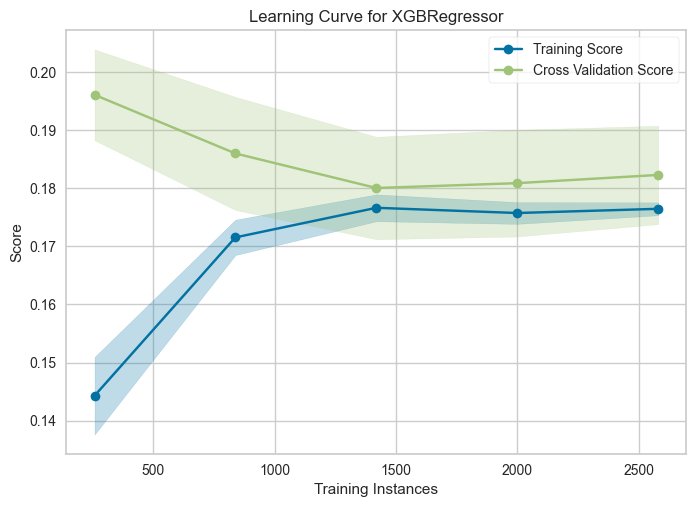

<Axes: title={'center': 'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [43]:
kurva = LearningCurve(best_model, scoring=make_scorer(mean_absolute_percentage_error))
kurva.fit(X_train, y_train) 
kurva.ax.set_title("MAPE For XG Boost Regressor") 
kurva.show()

insight:
1. **The Model Has Learned Well**
The curve shows that the model performs well on both training and validation data, with scores converging and stabilizing as the amount of training data increases.

2. **No Evidence of Overfitting**
The small gap between training and validation scores indicates the model is not overfitting and generalizes effectively to unseen data.

3. **Adding More Training Data Helps**
Increasing the training data size significantly reduces the validation error, demonstrating that the model benefits from more data.

4. **Model Performance Approaching Its Limit**
After a certain point, the performance improvement plateaus, suggesting that adding more data is unlikely to yield substantial gains.

## Residual Plot

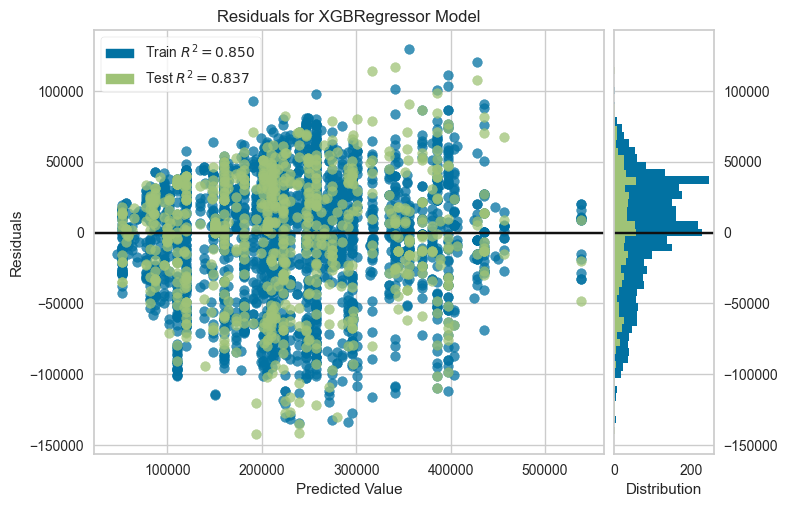

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(best_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

**Insight**:

1. Model is very good:

The R² values for train (0.850) and test (0.837) are very high and the difference between them is small, indicating that the model is not overfitting and generalizes well to new data.

2. Residuals are randomly scattered:

The residual points are fairly randomly distributed around the zero line for both train and test sets. This indicates that the model does not have systematic bias (no consistent over- or underestimation).

3. No strong bias pattern:

There is no residual pattern forming a curve or trend, meaning the model has captured the main patterns in the data effectively.

4. Residual distribution:

The histogram on the right shows the residuals are approximately symmetric, although there is a slight skew to the negative side (some predictions significantly underestimate the actual values).

5. Presence of outliers:

Some residual points are very large (both positive and negative), indicating there are data points that are difficult to predict or potential outliers in the data.

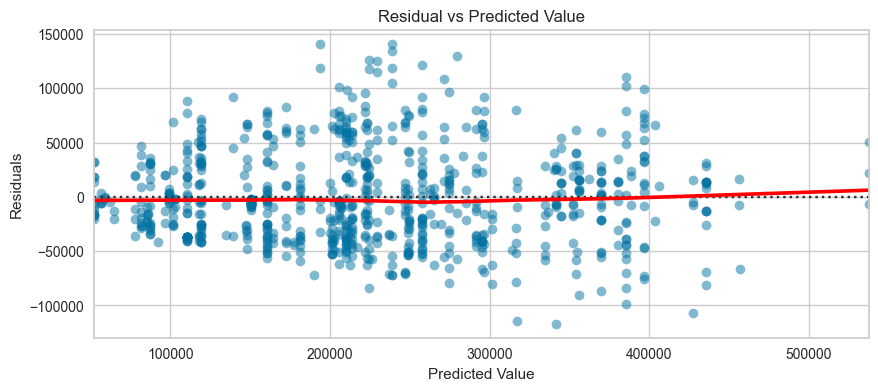

In [45]:
# Calculate residuals
residuals = y_test - y_pred_best

# Create residual plot
plt.figure(figsize=(10, 4))
plot = sns.residplot(
    x=y_pred_best,
    y=residuals,
    lowess=True,                           
    scatter_kws={'alpha': 0.5},
    line_kws={'color':'red'}             
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

plt.show()

**Insight**:
1. Red trend line is almost flat:

The red (fit) line is nearly parallel to the X-axis, indicating there is no systematic bias across the entire range of predicted values.

2. Residuals are fairly evenly spread:

The residuals are scattered around zero throughout the range of predicted values, with no funnel-shaped pattern (no widening or narrowing), which means the error variance is stable across the range.

3. No severe heteroscedasticity:

The residual points do not form a fan-shaped pattern, indicating the model errors are fairly consistent across all predicted values.

4. Presence of some outliers:

There are points far from the zero line, indicating some data are difficult to predict accurately.

## Actual vs Prediction

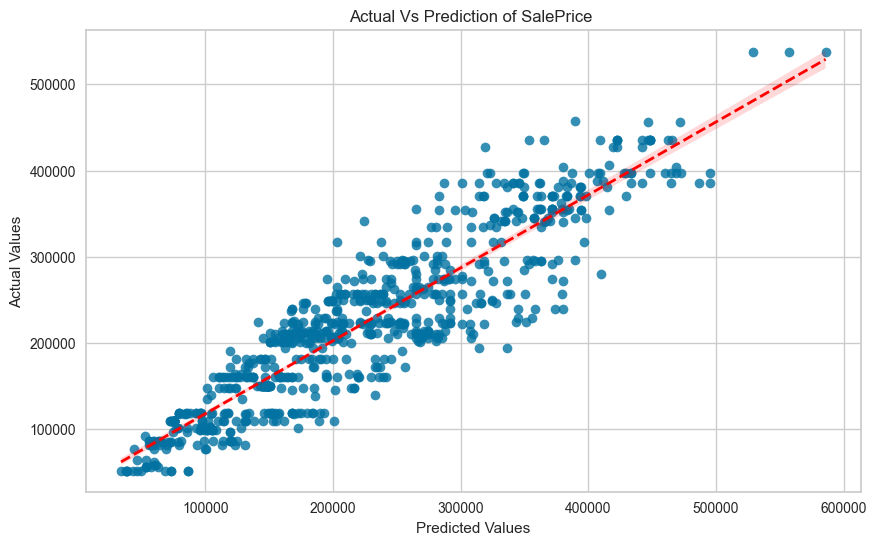

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred_best, ax=ax, line_kws={'color':'red', 'lw':2, 'alpha':1, 'ls':'--'})

ax.set_title('Actual Vs Prediction of SalePrice ')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

The scatter plot of actual versus predicted SalePrice demonstrates that the model performs with high accuracy and consistency. The data points are closely clustered around the ideal diagonal line, indicating that the predictions closely match the actual values without systematic bias. The fitted regression line nearly overlaps the perfect prediction line, further confirming that the model neither consistently overestimates nor underestimates prices. The residuals are evenly distributed across the entire range of predicted values, showing that the model maintains stable performance for both low and high price segments. Although a few outliers exist where predictions deviate significantly from actual prices, these are relatively rare and do not detract from the overall strong predictive capability of the model. Overall, this pattern suggests that the model effectively captures the main relationships between features and house prices, making it well-suited for reliable price prediction.

# Model Intepretation

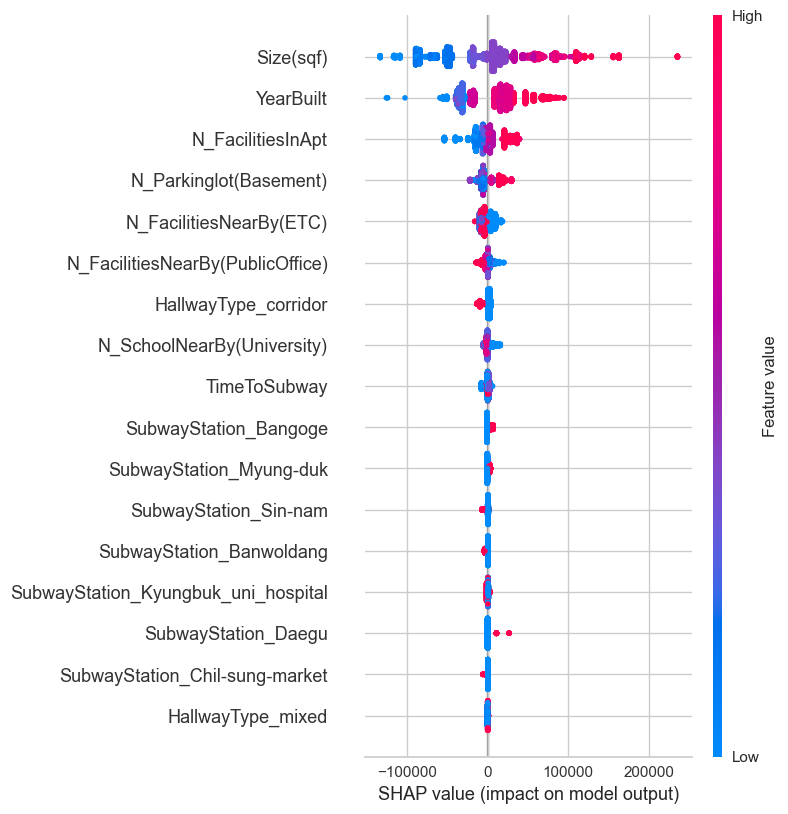

In [47]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

XGB_model = best_model.named_steps['model']
X_train_transformed = best_model.named_steps['preprocessing'].transform(X_train)

# SHAP explainer
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer.shap_values(X_train_transformed)

# Summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=X_train.columns)

**Insight:**

1. Size (sqf): The larger the apartment size, the higher the selling price.

2. YearBuilt: The newer the construction year of the apartment, the higher the price.

3. N_FacilitiesInApt: The more facilities available in the apartment, the higher the selling price.

4. N_Parkinglot (Basement): The more parking spots available, the higher the price can be.

5. N_SchoolNearBy (University): The more public facilities (such as universities) near the apartment, the selling price can decrease.

# Conclusion and Recommendation

## Business Conclussion

In [48]:
#After Tuning
best_model = grid_search.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# predict
y_pred_best = best_model.predict(X_test)

# MAPE Score
mape_after = mean_absolute_percentage_error(y_test, y_pred_best)

mape_after

0.17417281864943496

The MAPE value of the best model tested is 0.1742, or 17.4%. This indicates that the model can predict at least 82.6% of the apartment prices from the given data.

This can serve as a reference for homebuyers when assessing the price of an apartment they wish to purchase, with the caveat to prepare an additional 17.4% more than the predicted price. This is because the prediction might underestimate the actual apartment price by up to 17.4%.

For investors or apartment sellers, this predictive valuation model can also be used as a guideline for setting the selling price. However, it should be noted that the predicted price may deviate by 17.4%, meaning the valuation could be lower than the predicted market price.

Pricing can also be influenced by factors beyond the data, such as government policies, changes in facilities, or other features affecting the price. Therefore, this predictive model should be regularly updated to remain relevant and to improve its accuracy.

## Model Conclussion and Limitation

The machine learning model used is an XGBoost Regressor with the following parameter specifications:
1. `model__colsample_bytree`: 0.8
2. `model__gamma`: 0
3. `model__learning_rate`: 0.2
4. `model__max_depth`: 3
5. `model__min_child_weight`: 1
6. `model__n_estimators`: 250
7. `model__reg_alpha`: 0.1
8. `model__reg_lambda`: 1
9. `model__subsample`: 0.

This model achieves a Mean Absolute Percentage Error (MAPE) of 17.4%, meaning it accurately predicts approximately 82.6% of the data.

This result indicates the inherent limitation of the model, as it cannot perfectly predict 100% of a company’s selling price.

## Reccomendation

The machine learning model developed possesses inherent limitations in its predictive capabilities. To mitigate these limitations, it is advisable to perform regular updates by retraining the model with new and relevant data. Such periodic updates are particularly beneficial when additional features become available, which can enhance the model’s accuracy. For instance, incorporating data related to location, proximity to the city center, or other pertinent variables may significantly improve predictive performance.

Furthermore, users intending to employ this predictive model are encouraged to consider external factors that may influence valuation outcomes. These include governmental policies, market dynamics, and fluctuations driven by supply and demand. Accounting for such contextual elements will contribute to more precise and reliable predictions.

In [49]:
import joblib
joblib_file = "best_xgb_model.joblib"
joblib.dump(grid_search.best_estimator_, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to best_xgb_model.joblib
